In [262]:
import os
import geopandas as gpd
import pandas as pd
import numpy as np
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
import pyproj
from matplotlib import pyplot
import rioxarray as rxr
from rasterstats import zonal_stats

In [263]:
os.chdir(r'D:\iMMAP\proj\ASDC\data\pop_admin_layer')

In [264]:
# Load data
admin = gpd.read_file(r'input\admin.shp').to_crs('ESRI:53034')
sett = gpd.read_file(r'input\pplp-sample-updated.shp').to_crs('ESRI:53034')
build = gpd.read_file(r'input\buildings-sample.shp').to_crs('ESRI:53034')
pop = rio.open(r'process\pop-sample-ESRI53034.tif', masked=True)

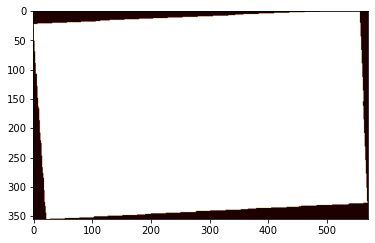

In [265]:
# View raster
pyplot.imshow(pop.read(1), cmap='pink')

<AxesSubplot:>

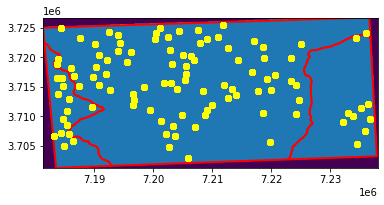

In [266]:
# View vector
ax = admin.plot(edgecolor='red', linewidth=2)
ax = sett.plot(ax=ax, color = 'yellow') #, facecolor='None', edgecolor='blue', linewidth=2)

show((pop, 1), ax=ax)

In [267]:
# Read the raster values
array = pop.read(1)

In [268]:
# View histogram and statistics
np.histogram(array, bins=100)

df_describe = pd.DataFrame(array)
df_describe.describe()

,0,1,2,3,4,5,6,7,8,9,...,561,562,563,564,565,566,567,568,569,570
count,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,...,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.0
mean,-97745.476562,-92111.687500,-92111.687500,-87041.281250,-81407.515625,-76337.125000,-76337.132812,-70421.679688,-64506.226562,-60280.906250,...,-39717.613281,-48449.960938,-60280.894531,-66759.750000,-73238.593750,-79717.445312,-86196.281250,-92956.796875,-99435.625000,-99999.0
std,14862.546875,26992.070312,26992.070312,33631.105469,38958.605469,42560.484375,42560.484375,45703.207031,47916.480469,49000.242188,...,49000.269531,50046.281250,49000.257812,47173.378906,44333.300781,40266.207031,34541.402344,25621.712891,7495.203125,0.0
min,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,...,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.0
25%,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,...,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.0
50%,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,...,0.359906,0.304329,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.0
75%,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,0.309372,0.331093,0.326148,...,0.531836,0.528392,0.366453,0.329397,0.293670,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.0
max,0.886433,0.863246,0.863246,0.863246,0.849136,0.836091,0.831331,0.852140,0.852140,0.838932,...,0.839849,0.782050,0.784296,0.791104,0.791104,0.460380,0.337656,0.340091,0.274780,-99999.0


In [269]:
# Set negative values to nan
array[(array < 0)] = np.nan

# Check result
df_describe = pd.DataFrame(array)
df_describe.describe()


,0,1,2,3,4,5,6,7,8,9,...,561,562,563,564,565,566,567,568,569,570
count,8.000000,28.000000,28.000000,46.000000,66.000000,84.000000,84.000000,105.000000,126.000000,141.000000,...,214.000000,183.000000,141.000000,118.000000,95.000000,72.000000,49.000000,25.000000,2.000000,0.0
mean,0.843703,0.796842,0.798475,0.716254,0.617135,0.559977,0.554597,0.501296,0.472972,0.445933,...,0.497208,0.502761,0.477325,0.448963,0.400409,0.328311,0.308268,0.306433,0.272157,NaN
std,0.028734,0.036721,0.034576,0.116546,0.175580,0.184748,0.181042,0.194890,0.192297,0.185811,...,0.129680,0.135261,0.145372,0.152974,0.139803,0.044434,0.019053,0.025907,0.003709,NaN
min,0.810608,0.743678,0.746173,0.495560,0.351384,0.325077,0.325133,0.285400,0.283881,0.240305,...,0.296501,0.296976,0.296976,0.280737,0.283890,0.274434,0.272331,0.269434,0.269534,NaN
25%,0.816908,0.759460,0.761836,0.595247,0.473734,0.370400,0.375291,0.342897,0.324886,0.308808,...,0.388025,0.367511,0.344468,0.329698,0.309988,0.294359,0.296762,0.277429,0.270846,NaN
50%,0.845914,0.810881,0.809237,0.753486,0.620943,0.529939,0.527682,0.441019,0.353263,0.346184,...,0.469301,0.521961,0.458287,0.364029,0.335447,0.322359,0.312295,0.308621,0.272157,NaN
75%,0.859567,0.817545,0.821745,0.813431,0.798125,0.766144,0.760210,0.704064,0.574133,0.526509,...,0.611220,0.621444,0.597052,0.572090,0.453430,0.338424,0.323239,0.330726,0.273469,NaN
max,0.886433,0.863246,0.863246,0.863246,0.849136,0.836091,0.831331,0.852140,0.852140,0.838932,...,0.839849,0.782050,0.784296,0.791104,0.791104,0.460380,0.337656,0.340091,0.274780,NaN


In [270]:
# Calculate zonal statistics
pop_dictionaries = zonal_stats(admin, array, affine=affine, stats=['sum'])


# Confert dictionaries to list of values
list_of_values = []
for i in range(len(pop_dictionaries)):
    list_of_values.append(list(pop_dictionaries[i].values())[0])

print(pop_dictionaries)
print(list_of_values)

[{'sum': 54536.39453125}, {'sum': 12784.6259765625}, {'sum': 2768.3154296875}]
[54536.39453125, 12784.6259765625, 2768.3154296875]


C:\Users\VMO\anaconda3\envs\earth2\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\Users\VMO\anaconda3\envs\earth2\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\Users\VMO\anaconda3\envs\earth2\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [271]:
# Adding pop_sum values to admin polygons
admin['pop_sum'] = list_of_values
admin

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_DA,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM2ALT1DA,ADM2ALT2DA,...,ADM0_PCODE,date,validOn,validTo,REG_EN,REG_DA,REG_PCODE,area,geometry,pop_sum
0,3.765413,0.280024,Pashtun Kot,پشتون کوټ,AF2902,None,None,None,None,None,...,AF,2017-12-12,2021-11-17,None,Northern,سهیلی حوزه,NR,978682691,"POLYGON ((7236676.246 3726733.219, 7236865.611...",54536.394531
1,2.274995,0.183478,Garzewan,گرزیوان,AF2908,None,None,None,None,None,...,AF,2017-12-12,2021-11-17,None,Northern,سهیلی حوزه,NR,222882672,"POLYGON ((7237955.763 3703203.249, 7222903.960...",12784.625977
2,3.448047,0.203026,Almar,المار,AF2904,None,None,None,None,None,...,AF,2017-12-12,2021-11-17,None,Northern,سهیلی حوزه,NR,99208235,"POLYGON ((7183562.911 3701242.555, 7181595.372...",2768.315430


In [272]:
# Calculating area and converting from square m to square km
admin['area_km2'] = admin['geometry'].area.div(1000000)
admin

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_DA,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM2ALT1DA,ADM2ALT2DA,...,date,validOn,validTo,REG_EN,REG_DA,REG_PCODE,area,geometry,pop_sum,area_km2
0,3.765413,0.280024,Pashtun Kot,پشتون کوټ,AF2902,None,None,None,None,None,...,2017-12-12,2021-11-17,None,Northern,سهیلی حوزه,NR,978682691,"POLYGON ((7236676.246 3726733.219, 7236865.611...",54536.394531,977.880983
1,2.274995,0.183478,Garzewan,گرزیوان,AF2908,None,None,None,None,None,...,2017-12-12,2021-11-17,None,Northern,سهیلی حوزه,NR,222882672,"POLYGON ((7237955.763 3703203.249, 7222903.960...",12784.625977,222.868461
2,3.448047,0.203026,Almar,المار,AF2904,None,None,None,None,None,...,2017-12-12,2021-11-17,None,Northern,سهیلی حوزه,NR,99208235,"POLYGON ((7183562.911 3701242.555, 7181595.372...",2768.315430,99.235964


In [273]:
sett

,ogc_fid,source,vil_uid,cntr_code,afg_uid,language_,lang_code,elevation,lat_y,lon_x,...,vuid_area_,vuidnear,vuid_build,vuid_popul,vuid_pop_p,vuid,name_local,name_loc_1,name_alter,geometry
0,34332,Yale POP_MASTER,GWN-005,0.0,FYB-GWN-005,Pashto,2.0,2061.352295,35.562600,65.061600,...,1.530664e+08,GWN-005,67.000000,480.702266,7.174661,GWN-005,آب پران,Low,Ab-Paran,MULTIPOINT (7234519.839 3705323.219)
1,35259,Yale POP_MASTER,GWN-031,0.0,FYB-GWN-031,Dari,1.0,1922.793579,35.586800,65.073800,...,9.154709e+06,GWN-031,53.000000,378.672748,7.144769,GWN-031,درۀ مرغابی,Very High,Darah-ye Murghabi,MULTIPOINT (7235876.417 3707511.897)
2,35261,Yale POP_MASTER,GWN-028,0.0,FYB-GWN-028,Dari,1.0,1895.293579,35.604100,65.040400,...,2.569005e+07,GWN-028,12.000000,86.109721,7.175810,GWN-028,خاک بادک,Moderate,Khak Badak,MULTIPOINT (7232162.507 3709076.125)
3,35262,Yale POP_MASTER,GWN-011,0.0,FYB-GWN-011,Dari,1.0,1773.379639,35.609900,65.082100,...,1.399860e+07,GWN-011,257.000000,1825.148038,7.101743,GWN-011,دهان دره,Very High,Dahan-e Darah,MULTIPOINT (7236799.335 3709600.473)
4,35264,Yale POP_MASTER,GWN-027,0.0,FYB-GWN-027,Dari,1.0,1790.790405,35.615500,65.056500,...,5.002918e+06,GWN-027,88.000000,624.694521,7.098801,GWN-027,کیکک,Very High,Kaykak,MULTIPOINT (7233952.745 3710106.704)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,39767,Yale POP_MASTER,QSR-142,0.0,FYB-QSR-142,Pashto,2.0,2095.349121,35.608200,64.613800,...,4.255202e+06,QSR-142,0.990846,7.158682,7.224816,QSR-142,None,Low,Poyen,MULTIPOINT (7184726.751 3709446.789)
7135,39778,Yale POP_MASTER,QSR-108,0.0,FYB-QSR-108,Uzbek,3.0,1902.561646,35.623700,64.619500,...,1.007921e+07,QSR-108,244.000000,1732.107535,7.098801,QSR-108,حلوا خور,Moderate,Halwa Khor,MULTIPOINT (7185360.562 3710847.906)
7136,39794,Yale POP_MASTER,QSR-109,0.0,FYB-QSR-109,Dari,1.0,1755.760010,35.646100,64.623700,...,3.977923e+06,QSR-109,74.000000,528.419653,7.140806,QSR-109,حلوا خور,Very High,Halwa Khor,MULTIPOINT (7185827.581 3712872.266)
7137,39801,USAID AIDVillageView,QSR-001,0.0,FYB-QSR-001,Uzbek,3.0,1601.409546,35.655300,64.606300,...,9.803656e+06,QSR-001,129.000000,915.871391,7.099778,QSR-001,ابدل,Very High,`Abdul,MULTIPOINT (7183892.789 3713703.536)


In [274]:
# Join settlements to admin areas
joined_df = gpd.sjoin(
    sett,
    admin,
    how='inner',
    op='intersects',
)

# Count number of settlement within admin polygons
sett_count = joined_df.groupby(
    ['ADM2_PCODE'],
    as_index=False,
)['vuid'].count() # vuid is arbitrary, we just count the rows

# Change column name to sett_count
sett_count.rename(columns = {'vuid': 'sett_count'}, inplace = True)

# QA Check - if any admin areas have no settlements
sett_count.isnull().sum()

# View results
sett_count

C:\Users\VMO\anaconda3\envs\earth2\lib\site-packages\IPython\core\interactiveshell.py:3301: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,ADM2_PCODE,sett_count
0,AF2902,6889
1,AF2904,169
2,AF2908,81


In [275]:
# Merge sett count back on to admin dataset
admin = admin.merge(
    sett_count, 
    on='ADM2_PCODE', 
    how='left')

admin

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_DA,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM2ALT1DA,ADM2ALT2DA,...,validOn,validTo,REG_EN,REG_DA,REG_PCODE,area,geometry,pop_sum,area_km2,sett_count
0,3.765413,0.280024,Pashtun Kot,پشتون کوټ,AF2902,None,None,None,None,None,...,2021-11-17,None,Northern,سهیلی حوزه,NR,978682691,"POLYGON ((7236676.246 3726733.219, 7236865.611...",54536.394531,977.880983,6889
1,2.274995,0.183478,Garzewan,گرزیوان,AF2908,None,None,None,None,None,...,2021-11-17,None,Northern,سهیلی حوزه,NR,222882672,"POLYGON ((7237955.763 3703203.249, 7222903.960...",12784.625977,222.868461,81
2,3.448047,0.203026,Almar,المار,AF2904,None,None,None,None,None,...,2021-11-17,None,Northern,سهیلی حوزه,NR,99208235,"POLYGON ((7183562.911 3701242.555, 7181595.372...",2768.315430,99.235964,169


In [276]:
# Convert building polygons to centroid points

# Convert building geodataframe to geoseries
build_centroids = build.geometry

# Create a geoseries with just the centroids
build_centroids = build_centroids.centroid

# Convert geoseries to geodataframe
build_centroids= gpd.GeoDataFrame(build_centroids)

# Rename column
build_centroids.rename(columns = {0: 'geo'}, inplace = True)

# Setting geometry columns specifically
build_centroids.geometry = build_centroids['geo']

In [277]:
# Join building to admin areas
joined_df = gpd.sjoin(
    build_centroids,
    admin,
    how='inner',
    op='intersects'
)

# Count number of buildings within admin polygons
build_count = joined_df.groupby(
    ['ADM2_PCODE'],
    as_index=False,
)['geo'].count() # vuid is arbitrary, we just count the rows


# Change column name to build_count
build_count.rename(columns = {'geo': 'build_count'}, inplace = True)

# QA Check - if any admin areas have no buildings
build_count.isnull().sum()

# View results
build_count

C:\Users\VMO\anaconda3\envs\earth2\lib\site-packages\IPython\core\interactiveshell.py:3301: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,ADM2_PCODE,build_count
0,AF2902,12461
1,AF2904,358
2,AF2908,1523


In [278]:
# Merge build count back on to admin dataset
admin = admin.merge(
    build_count, 
    on='ADM2_PCODE', 
    how='left')

admin

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_DA,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM2ALT1DA,ADM2ALT2DA,...,validTo,REG_EN,REG_DA,REG_PCODE,area,geometry,pop_sum,area_km2,sett_count,build_count
0,3.765413,0.280024,Pashtun Kot,پشتون کوټ,AF2902,None,None,None,None,None,...,None,Northern,سهیلی حوزه,NR,978682691,"POLYGON ((7236676.246 3726733.219, 7236865.611...",54536.394531,977.880983,6889,12461
1,2.274995,0.183478,Garzewan,گرزیوان,AF2908,None,None,None,None,None,...,None,Northern,سهیلی حوزه,NR,222882672,"POLYGON ((7237955.763 3703203.249, 7222903.960...",12784.625977,222.868461,81,1523
2,3.448047,0.203026,Almar,المار,AF2904,None,None,None,None,None,...,None,Northern,سهیلی حوزه,NR,99208235,"POLYGON ((7183562.911 3701242.555, 7181595.372...",2768.315430,99.235964,169,358


In [287]:
# Calculate population density
admin['pop_density'] = admin['pop_sum'] / admin['area_km2']
admin

# Calculate people per building
admin['people_building'] = admin['pop_sum'] / admin['build_count']

admin

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_DA,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM2ALT1DA,ADM2ALT2DA,...,REG_PCODE,area,geometry,pop_sum,area_km2,sett_count,build_count,pop_densit,pop_density,people_building
0,3.765413,0.280024,Pashtun Kot,پشتون کوټ,AF2902,None,None,None,None,None,...,NR,978682691,"POLYGON ((7236676.246 3726733.219, 7236865.611...",54536.394531,977.880983,6889,12461,55.769971,55.769971,4.376566
1,2.274995,0.183478,Garzewan,گرزیوان,AF2908,None,None,None,None,None,...,NR,222882672,"POLYGON ((7237955.763 3703203.249, 7222903.960...",12784.625977,222.868461,81,1523,57.363998,57.363998,8.394370
2,3.448047,0.203026,Almar,المار,AF2904,None,None,None,None,None,...,NR,99208235,"POLYGON ((7183562.911 3701242.555, 7181595.372...",2768.315430,99.235964,169,358,27.896292,27.896292,7.732725
